In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import os
from shutil import copy2
import csv

from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # The %tensorflow_version magic only works in colab.
  %tensorflow_version 2.x
except Exception:
  pass


import os
import numpy as np
import matplotlib.pyplot as plt



In [26]:
test_root = ('base_dir/val_dir')

In [27]:
IMAGE_SHAPE = (224, 224)
test_data_dir = str(test_root)

In [28]:
datagen_kwargs = dict(rescale=1./255)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
test_generator = test_datagen.flow_from_directory(
    test_data_dir, 
    shuffle=True,
    target_size=IMAGE_SHAPE)

Found 1001 images belonging to 7 classes.


In [29]:
import tensorflow_hub as hub

model = tf.keras.models.load_model('model/model_second.h5', custom_objects={'KerasLayer': hub.KerasLayer})

In [30]:

final_loss, final_accuracy = model.evaluate(test_generator, steps = 50)
print("Final loss: {:.2f}".format(final_loss))
print("Final accuracy: {:.2f}%".format(final_accuracy * 100))

32/50 [==================>...........] - ETA: 19s - loss: 0.7488 - acc: 0.7912WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 50 batches). You may need to use the repeat() function when building your dataset.


50/50 [==============================] - 35s 676ms/step - loss: 0.7488 - acc: 0.7912
Final loss: 0.75
Final accuracy: 79.12%


In [31]:
val_image_batch, val_label_batch = next(iter(test_generator))
true_label_ids = np.argmax(val_label_batch, axis=-1)
print("Validation batch shape:", val_image_batch.shape)

Validation batch shape: (32, 224, 224, 3)


In [32]:
dataset_labels = sorted(test_generator.class_indices.items(), key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)

['Akiec' 'Bcc' 'Bkl' 'Df' 'Mel' 'Nv' 'Vasc']


In [33]:
tf_model_predictions = model.predict(val_image_batch)
print("Prediction results shape:", tf_model_predictions.shape)

Prediction results shape: (32, 7)


In [34]:
predicted_ids = np.argmax(tf_model_predictions, axis=-1)
predicted_labels = dataset_labels[predicted_ids]
print(predicted_labels)

['Mel' 'Mel' 'Mel' 'Mel' 'Nv' 'Nv' 'Mel' 'Nv' 'Nv' 'Nv' 'Nv' 'Nv' 'Nv'
 'Nv' 'Bkl' 'Nv' 'Bcc' 'Mel' 'Nv' 'Nv' 'Df' 'Mel' 'Nv' 'Nv' 'Nv' 'Nv' 'Nv'
 'Mel' 'Nv' 'Nv' 'Nv' 'Nv']


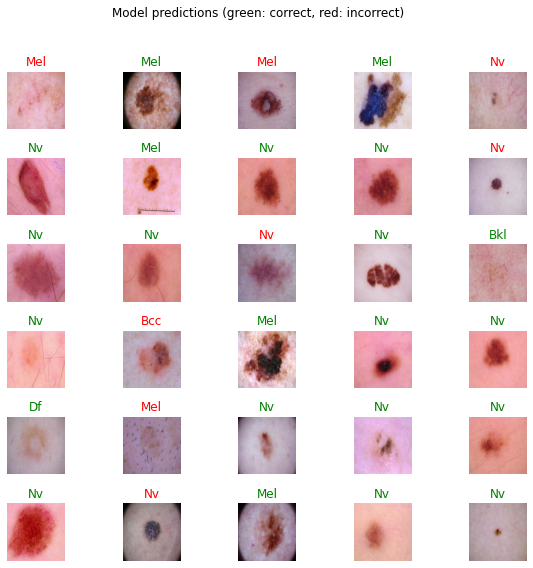

In [35]:

plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range((len(predicted_labels)-2)):
  plt.subplot(6,5,n+1)
  plt.imshow(val_image_batch[n])
  color = "green" if predicted_ids[n] == true_label_ids[n] else "red"
  plt.title(predicted_labels[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")